In [80]:
import numpy as np
from time import sleep 
from numpy import asarray as npa
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
inf = 100000

In [107]:
m1 = np.array([1.0, 3.0])
m2 = np.array([-1.0, 0.0])
m3 = np.array([2.0, -1.0])

c1 = np.array([[0.8, 0.3], [0.3, 0.9]])
c2 = np.array([[0.9, 0.4], [0.4, 0.8]])
c3 = np.array([[0.7, 0.2], [0.2, 0.8]])

sz = 200
d1 = np.random.multivariate_normal(m1, c1, sz)
d2 = np.random.multivariate_normal(m2, c2, sz)
d3 = np.random.multivariate_normal(m3, c3, sz)

xt = np.zeros((sz*3, d1.shape[1]))
xt[:sz] = d1[:]
xt[sz: 2*sz] = d2[:]
xt[2*sz:] = d3[:]

def cost(x,y):
    return np.sqrt(((x-y)**2).sum())

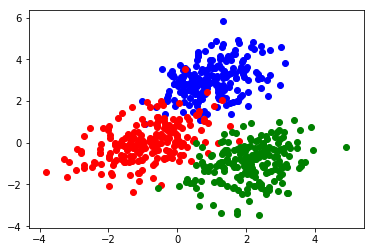

In [108]:
plt.figure(0)
plt.scatter(d1[:,0], d1[:,1], color = 'blue')
plt.scatter(d2[:,0], d2[:,1], color = 'red')
plt.scatter(d3[:,0], d3[:,1], color = 'green')

In [109]:
def createDict(k, xt=None, centers=None):
    #If we're already given a numpy array of centers, create a dictionary of those centers 
    if type(centers) != type(None):
        C = []
        for kx in range(k):
            cluster = {
                        'center': centers[kx],
                        'points': []
                      } 
            C.append(cluster)
        return C
    
    
    #Else create a dictionary within the range of max and min of xt
    C = []
    minv, maxv = xt.min(), xt.max()
    centers = np.random.uniform(low = minv, high = maxv, size = (k,xt.shape[1]))
    for kx in range(k):
        cluster = {
                    'center':centers[kx,:],
                    'points':[]
                  } 
        C.append(cluster)
    return C

print createDict(2,xt,[[1,1],[2,2]])[1]['center']

[2, 2]


In [110]:
def plot(k,C,figure):
    plt.figure(figure)
    colours = ['red','blue', 'green', 'pink', 'yellow']
    
    for kx in range(k):
        if len(C[kx]['points']) != 0:
            pts = npa(C[kx]['points'])
            plt.scatter(pts[:,0], pts[:,1], color = colours[kx])
        
    for kx in range(k):
        plt.scatter(C[kx]['center'][0], C[kx]['center'][1], color = 'black')

In [111]:
def kmeans(k,xt,centers, itn=9, toPlot = False):
    C = createDict(k,xt,centers)
    
    for it in range(itn):        
    
        #Put points in clusters
        for point in xt:
            minv = inf
            kc = -1
            for kx in range(k):
                dist = cost(point,C[kx]['center'])
                if dist < minv:
                    minv = dist
                    kc = kx
            C[kc]['points'].append(point)
        
        if it == itn-1:
            break
        
        if toPlot == True:
            plot(k,C,it)
        
        #Shift centers to mean of points
        for kx in range(k):
            pts = npa(C[kx]['points'])
            if len(pts) == 0:
                pass
            else:
                mean = pts.mean(axis=0)
                C[kx]['center'] = mean
                C[kx]['points'] = []
    return C  

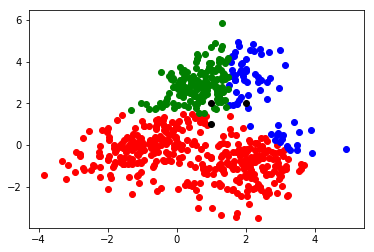

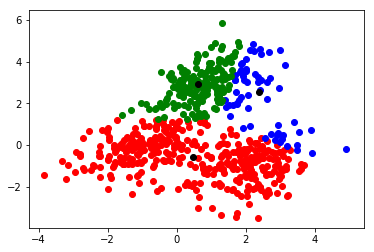

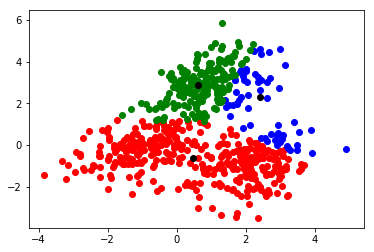

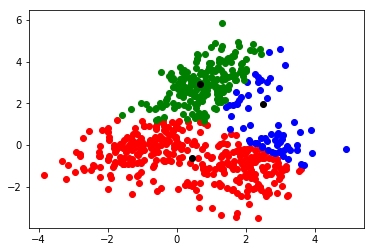

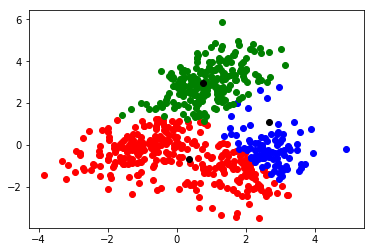

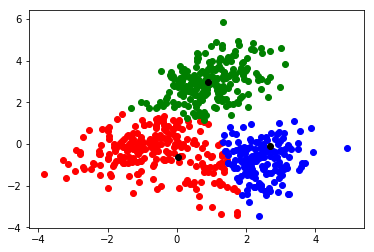

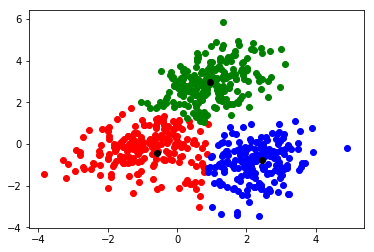

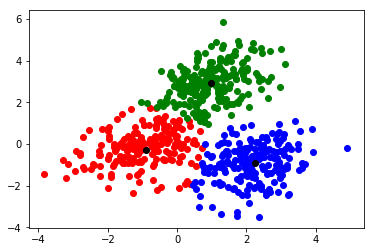

In [113]:
k=3
centers = [[1,1],[2,2],[1,2],[-1,0],[5,5]]
C = kmeans(k,xt,centers, toPlot = True);